**Employee Attrition Prediction**

Create a classification model to predict employee attrition using a given dataset. The dataset
includes various features related to employees, and the column names are selfexplanatory

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the data from excel
data=pd.read_csv('/content/Employee.csv')

In [ ]:
#showing the first 5 rows of the dataset
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
#Shape of the dataset
data.shape

(74498, 24)

In [ ]:
#Checking the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

Out of the 24 features 16 are object type, 6 are integers and 2 are float type data. Also there are some missing values in the dataset

In [ ]:
#checking missing values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

since there are few missing values we can remove those observaations

In [ ]:
#Removing missing values
data.dropna(inplace=True)

In [ ]:
#Verifying whether missing values are removed
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

Now missing the values are removed

In [ ]:
data.shape

(74461, 24)

After removing missing values there are 74461 observations remaining

In [ ]:
#Since Employee ID is not necessary for our analysis we can remove that column
data.drop('Employee ID',axis=1,inplace=True)

In [ ]:
#Checking the basic statistical meaasures for the given data using describe function
data.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,74461.000000,74461.000000,74461.000000,74461.000000,74461.000000,74461.000000,74461.000000
mean,38.528518,15.721331,7299.385061,0.833013,49.993473,1.650327,55.729966
std,12.083360,11.222666,2152.585616,0.995273,28.512592,1.553706,25.398515
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,39.000000,13.000000,7348.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [ ]:
#Checking the Describe for object type variables
data.describe(include='object')

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461,74461
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40805,19315,28142,37223,44691,50133,22321,37404,29764,37212,60268,70809,62360,37163,29604,39113


Outlier detection and Treatment

In [ ]:
#Creating Boxplots for outlier detection
n_col=data.select_dtypes(include=["int64","float64"]).columns

In [ ]:
n_col

Index(['Age', 'Years at Company', 'Monthly Income', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Company Tenure'],
      dtype='object')

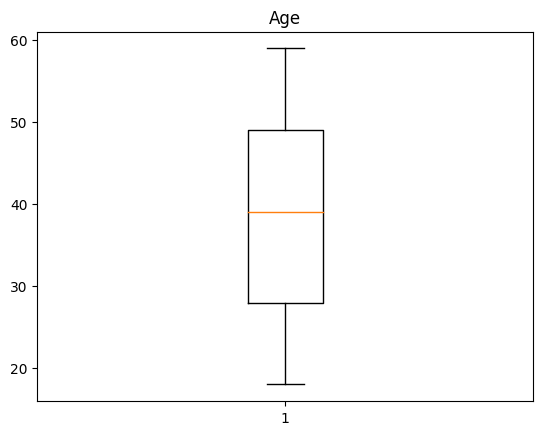

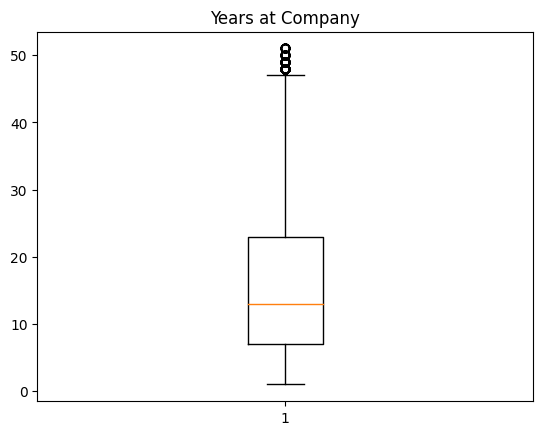

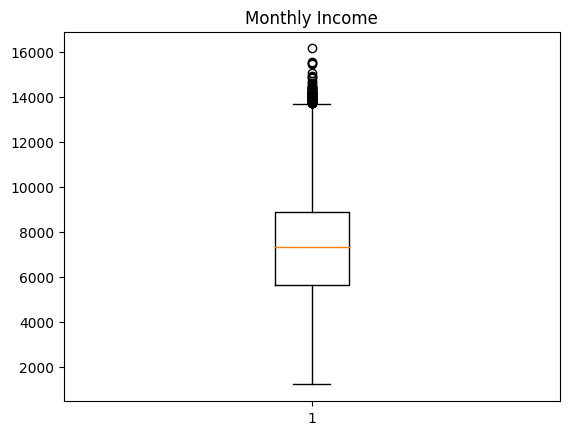

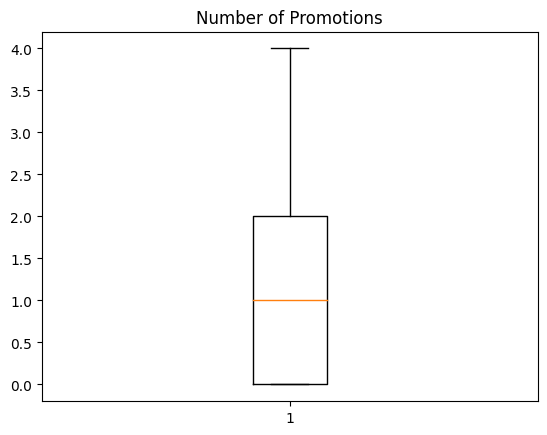

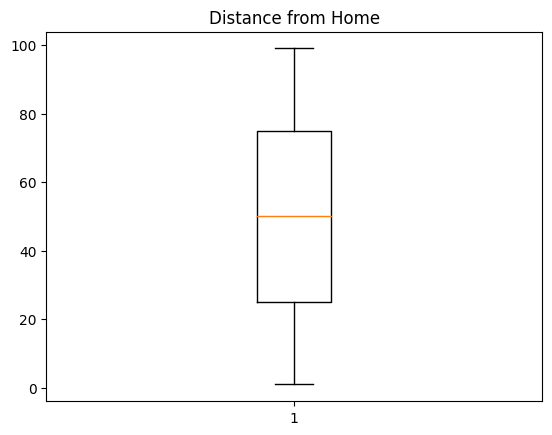

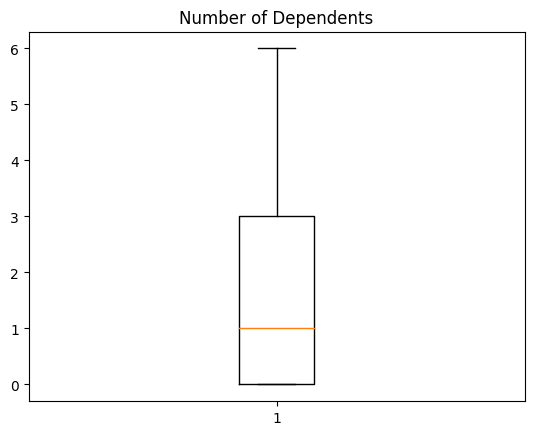

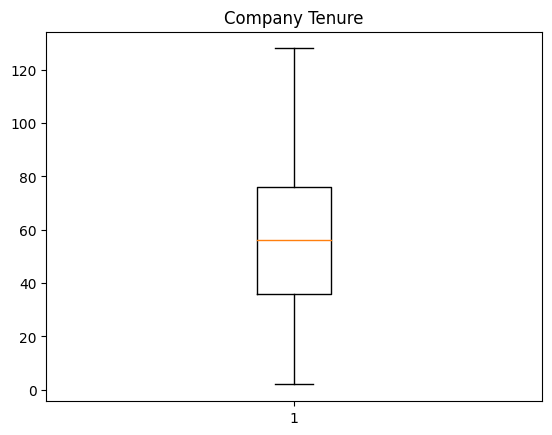

In [ ]:
for i in n_col:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

From the boxplot feature "years at company" and "Monthly income" have outliers in them

In [ ]:
#Finding the outlier observation
#Finding frist and third quartile
Q1=data['Years at Company'].quantile(0.25)
Q3=data['Years at Company'].quantile(0.75)
#Finding IQR
IQR=Q3-Q1
#Finding lower and upper limit
low_limi=Q1-1.5*IQR
upper_limi=Q3+1.5*IQR
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)
print("lower value",low_limi)
print("upper value",upper_limi)

Q1 : 7.0
Q3 : 23.0
IQR : 16.0
lower value -17.0
upper value 47.0


In [ ]:
#finding outliers
outlier=[]

for x in data['Years at Company']:
  if ((x<low_limi) or (x>upper_limi)):
    outlier.append(x)

print(outlier)

[48, 49, 49, 48, 48, 49, 50, 48, 50, 48, 48, 49, 48, 51, 48, 48, 51, 48, 48, 48, 48, 49, 49, 50, 51, 48, 48, 50, 48, 49, 48, 49, 48, 48, 49, 50, 48, 48, 48, 49, 49, 49, 48, 49, 50, 51, 49, 48, 51, 49, 49, 48, 50, 50, 49, 49, 49, 50, 48, 48, 48, 48, 48, 49, 48, 51, 48, 49, 50, 49, 48, 48, 48, 49, 51, 48, 50, 50, 50, 50, 50, 48, 49, 48, 49, 49, 50, 49, 51, 48, 50, 49, 48, 48, 50, 48, 49, 48, 48, 48, 48, 50, 51, 49, 49, 49, 48, 51, 48, 49, 49, 50, 50, 48, 51, 49, 49, 48, 48, 48, 48, 49, 50, 49, 48, 49, 50, 48, 48, 49, 48, 49, 48, 48, 51, 49, 50, 48, 48, 48, 50, 48, 51, 50, 48, 49, 49, 49, 51, 49, 48, 49, 51, 48, 50, 50, 49, 48, 48, 48, 49, 48, 48, 51, 48, 49, 48, 48, 48, 49, 48, 51, 49, 49, 48, 48, 50, 48, 48, 49, 48, 48, 49, 49, 50, 50, 49, 48, 49, 48, 48, 48, 50, 51, 50, 49, 48, 50, 50, 48, 48, 50, 49, 49, 48, 49, 48, 48, 48, 49, 49, 48, 48, 49, 49, 49, 51, 48, 51, 48, 49, 49, 48, 50, 50, 51, 49, 49, 48, 48, 51, 49, 48, 49, 48, 51, 49, 48, 49, 49, 49, 50, 49, 49, 50, 51, 49, 50, 49, 49,

In [ ]:
#Number of outliers
len(outlier)

338

Here we have 338 outlier observations but our upper limit value is 47 and all these outliers are very near to 47 therefore i think we can keep these outlier observations

In [ ]:
#Checking outliers for Monthly Income
#Finding frist and third quartile
Q1=data['Monthly Income'].quantile(0.25)
Q3=data['Monthly Income'].quantile(0.75)
#Finding IQR
IQR=Q3-Q1
#Finding lower and upper limit
low_limi=Q1-1.5*IQR
upper_limi=Q3+1.5*IQR
print("Q1 :",Q1)
print("Q3 :",Q3)
print("IQR :",IQR)
print("lower value",low_limi)
print("upper value",upper_limi)

Q1 : 5652.0
Q3 : 8876.0
IQR : 3224.0
lower value 816.0
upper value 13712.0


In [ ]:
#finding outliers
outlier=[]

for x in data['Monthly Income']:
  if ((x<low_limi) or (x>upper_limi)):
    outlier.append(x)

print(outlier)

[15495, 13961, 14014, 14016, 14176, 13962, 14276, 14066, 13876, 14421, 13959, 13722, 13747, 13768, 14622, 13739, 14163, 16149, 13833, 14271, 14235, 13800, 14226, 13988, 14147, 14286, 14885, 13859, 14396, 14210, 13715, 14127, 13793, 14002, 14185, 14076, 14067, 13875, 14398, 14137, 14103, 14924, 13728, 13713, 14405, 13877, 15464, 15552, 14839, 14406, 14110, 13840, 14412, 13896, 14021, 14181, 14292, 13893, 13830, 13764, 14707, 14433, 14028, 14547, 15063]


In [ ]:
len(outlier)

65

We have 65 outliers and i am removing these outliers

In [ ]:
data.drop(data.index[data['Monthly Income']>upper_limi],inplace=True)

In [ ]:
data.shape

(74396, 23)

Now we have 74396 observations

#Encoding

In [ ]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,No,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,59,Female,4,Media,5534,Poor,High,Low,3.0,No,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,24,Female,10,Healthcare,8159,Good,High,Low,0.0,No,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,36,Female,7,Education,3989,Good,High,High,1.0,No,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,56,Male,41,Education,4821,Fair,Very High,Average,0.0,Yes,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [ ]:
data.describe(include='object')

,Gender,Job Role,Work-Life Balance,Job Satisfaction,Performance Rating,Overtime,Education Level,Marital Status,Job Level,Company Size,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396,74396
unique,2,5,4,4,4,2,5,3,3,3,2,2,2,4,4,2
top,Male,Technology,Good,High,Average,No,Bachelor’s Degree,Married,Entry,Medium,No,No,No,Good,Low,Stayed
freq,40773,19290,28120,37199,44648,50086,22302,37372,29738,37175,60216,70750,62308,37136,29582,39081


Here i am going for label encoding

In [ ]:
#Importing label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
n_columns=data.select_dtypes(include=["object"]).columns

In [ ]:
n_columns


Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [ ]:
#Encoding
for i in n_columns:
 data[i]=le.fit_transform(data[i])


In [ ]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,5534,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10,2,8159,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7,0,3989,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41,0,4821,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1


#Classification

Here we need to predict the attrition which is a categoricaal variable that means we need to use classification technique. Here Attrition is a binary feature with observations "stayed" and "not stayed"

Here initially we can go for logistic regression

In [ ]:
#Splitting the dataset
X=data.drop('Attrition',axis=1)

In [ ]:
Y=data['Attrition']

In [ ]:
#Importing Train Test split
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the data into train and test by stratifying at Attrition
x_train, x_test, y_train, y_test = train_test_split( X, Y, stratify=Y, test_size=0.2 )

In [ ]:
#Number of observation in train and test
x_train.shape,x_test.shape

((59516, 22), (14880, 22))

In [ ]:
#Importing logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [ ]:
#Fitting the model
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predicting
log_pred=log_reg.predict(x_test)

Now we need to evaluate our model

In [ ]:
#Importing Matrices for evaluating our model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

In [ ]:
#The confusion matrix
confusion_matrix(y_test,log_pred)

array([[4562, 2501],
       [2293, 5524]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,log_pred))
print("Precision:",precision_score(y_test,log_pred))
print("recall:",recall_score(y_test,log_pred))
print("F1",f1_score(y_test,log_pred))

Accuracy: 0.6778225806451613
Precision: 0.6883489096573209
recall: 0.7066649609824741
F1 0.6973866935992931


#K Nearest Neighbour Technique

In [ ]:
#Finding Optimal number of neighbours
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,25)

In [ ]:
#Creating a loop to find accuracy of each number of neighbours
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric k')

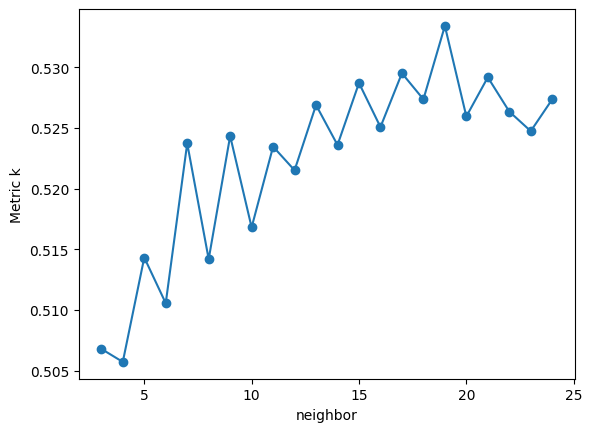

In [ ]:
#Plotting  Accuracy vs Neighbour matrix
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("neighbor")
plt.ylabel("Metric k")

From the above plot accuracy is the highest when the number of neighbours is at 19

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=19,metric="minkowski",p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

In [ ]:
confusion_matrix(y_test,knn_pred)

array([[3110, 3953],
       [2990, 4827]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,knn_pred))
print("Precision:",precision_score(y_test,knn_pred))
print("recall:",recall_score(y_test,knn_pred))
print("F1",f1_score(y_test,knn_pred))

Accuracy: 0.5334005376344086
Precision: 0.5497722095671982
recall: 0.6175003198157861
F1 0.5816713863951317


# Decision Tree

In [ ]:
#Here i will be using the Grid search method for finding the best parameters infitting the Decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Tuning the parameters
grid={"max_depth": [2,3,4,5,6,7,8,9],
      "min_samples_split":[4,5,6,7,8,9],
      "min_samples_leaf" :[1,2,3,4,5,6,7,8,9]
      }

In [ ]:
#Finding the best parameters
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()
gcv=GridSearchCV(estimator=classifier,param_grid=grid)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [4, 5, 6, 7, 8, 9]})

In [ ]:
#Fitting the model using best parameter
dt_clf_=gcv.best_estimator_
dt_clf_.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, min_samples_split=4)

In [ ]:
print("Accuracy of test: ",accuracy_score(y_test,dt_clf_.predict(x_test)))

Accuracy of train:  0.746017877545534
Accuracy of test:  0.7278225806451613


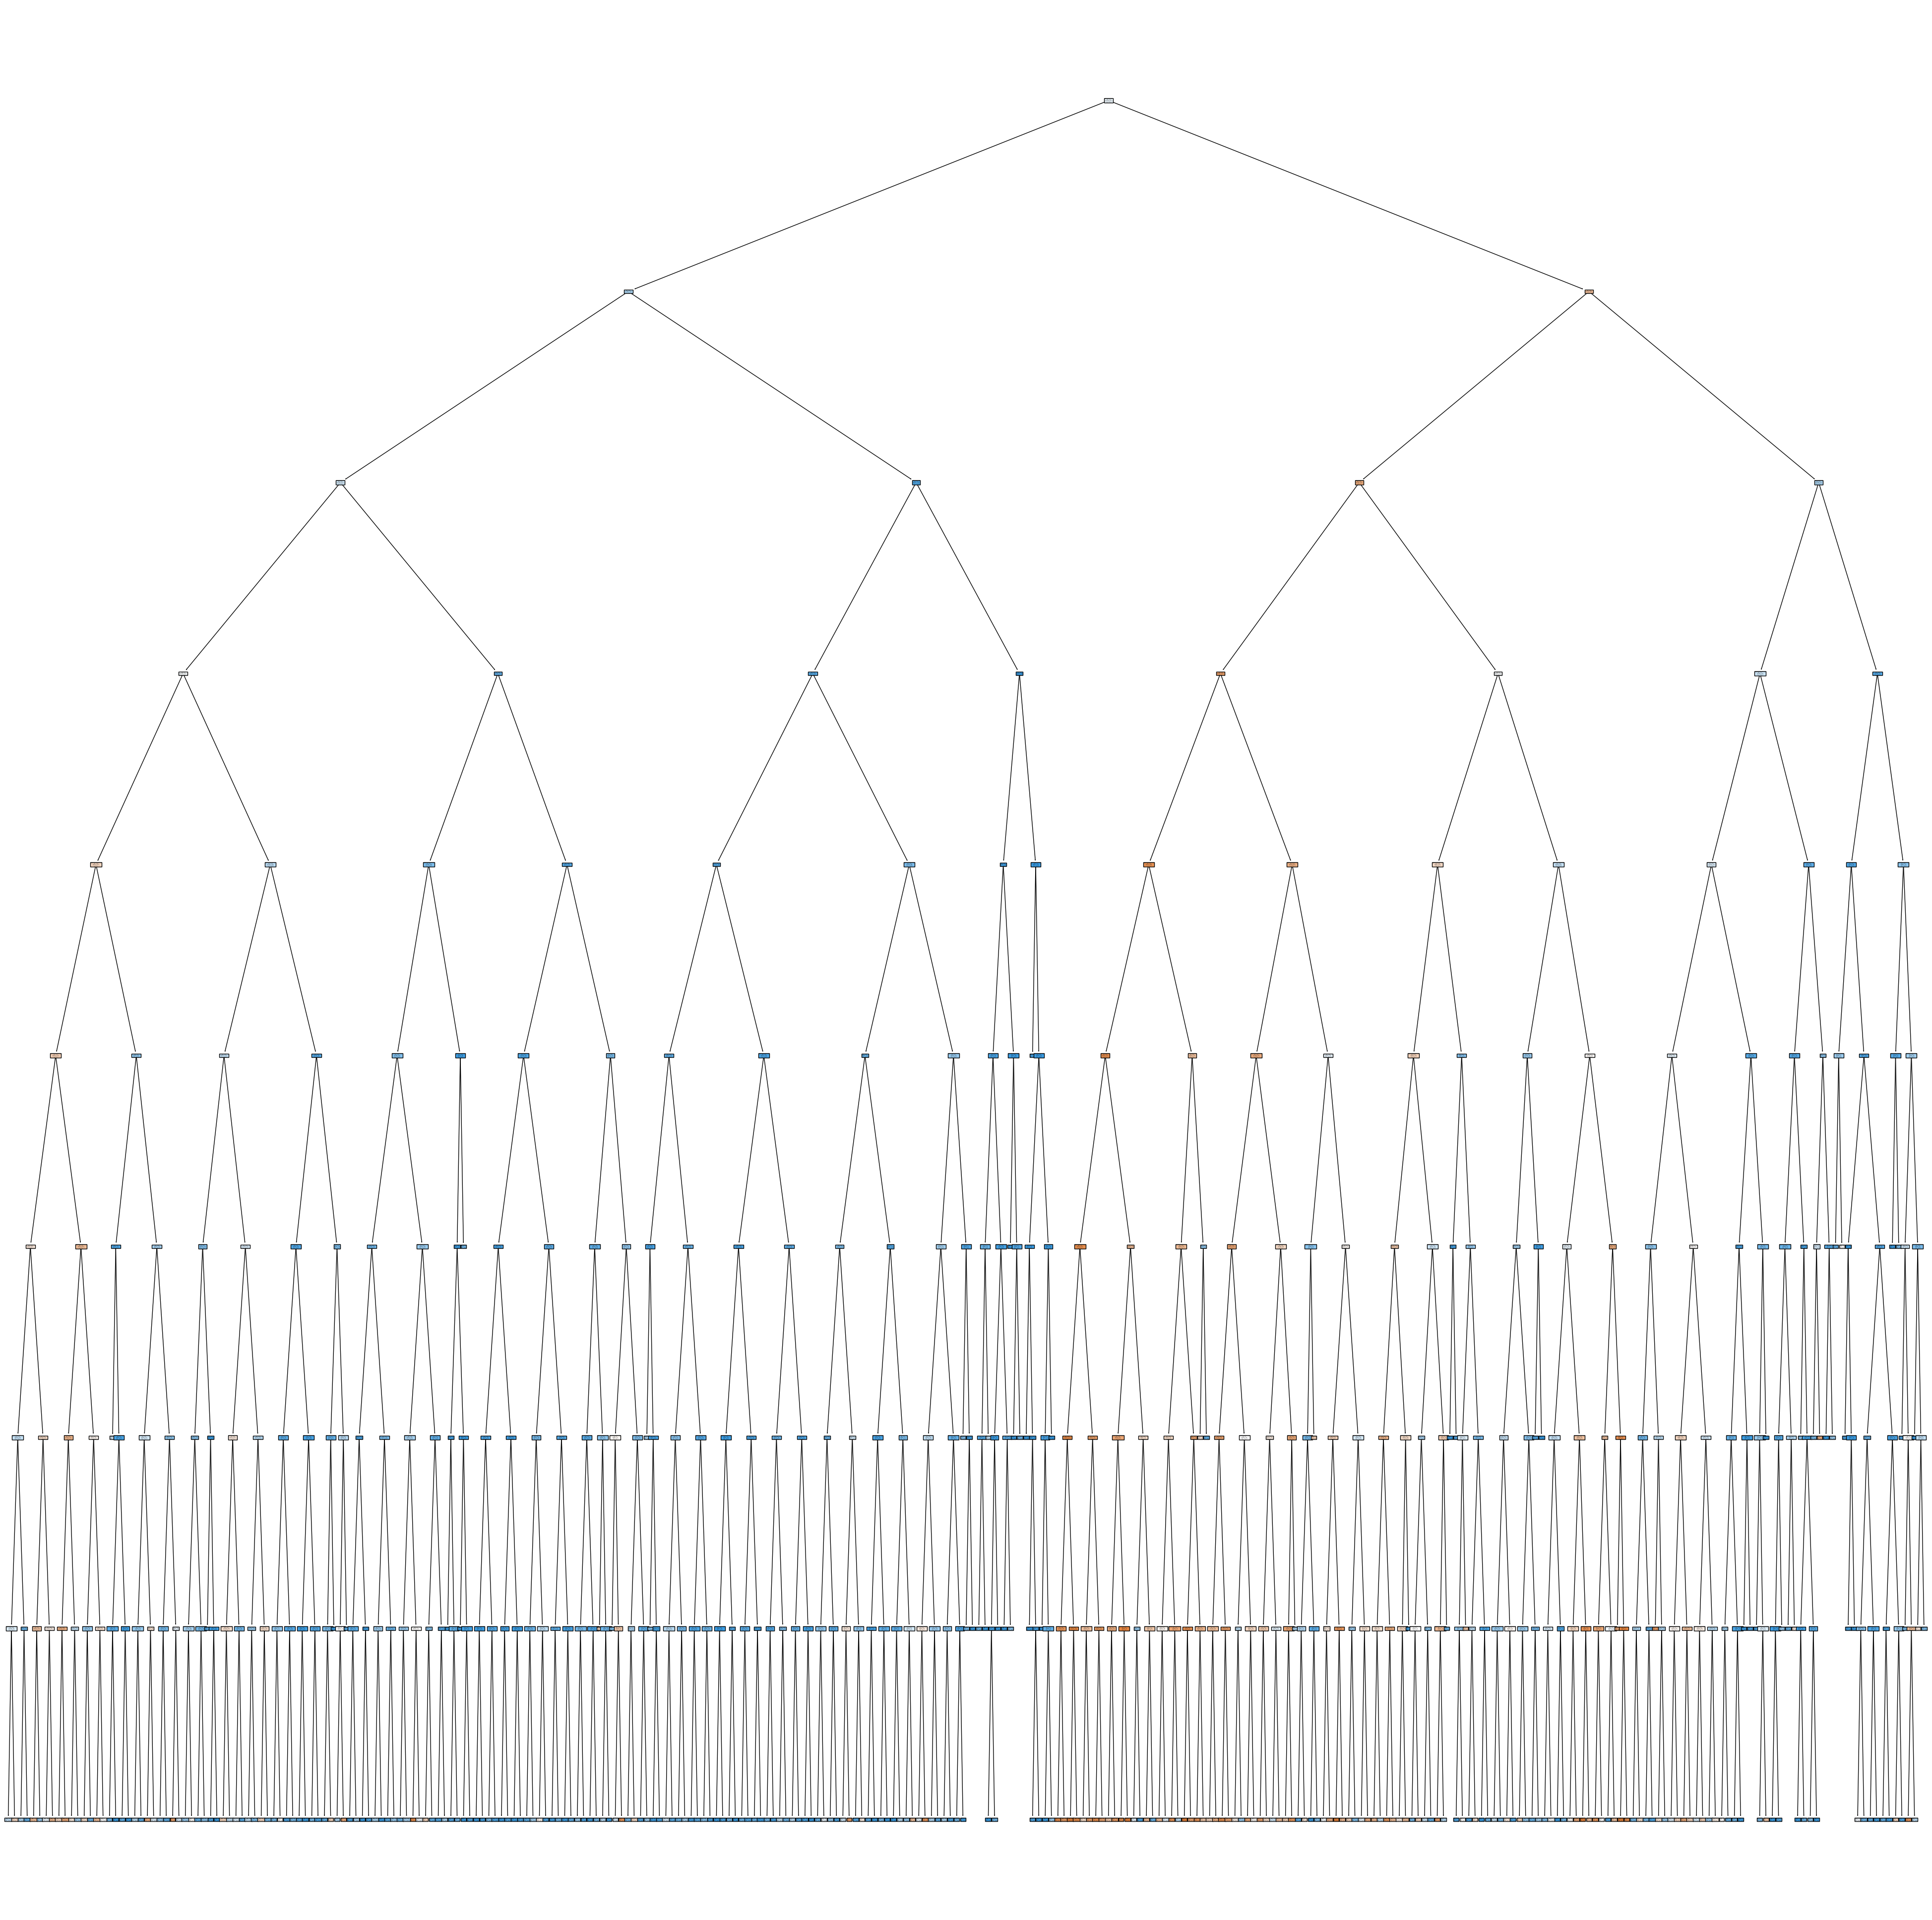

In [ ]:
#Decision Tree
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(dt_clf_,
               feature_names= list(X.columns),
               class_names=["Left","Stayed"],
               filled=True);

#Logistic Regression after Mininmax scaling

In [ ]:
data.describe()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
count,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,...,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000,74396.000000
mean,38.528886,0.548054,15.722015,2.119106,7293.333513,1.476195,1.102290,0.700293,0.832921,0.326765,...,1.650425,0.802113,1.099884,55.727795,0.190602,0.049008,0.162482,1.805500,1.153825,0.525311
std,12.083384,0.497689,11.222955,1.471579,2143.714934,0.942752,1.223378,0.954453,0.995205,0.469034,...,1.553749,0.749942,0.700242,25.398872,0.392778,0.215886,0.368895,0.872684,0.852426,0.499362
min,18.000000,0.000000,1.000000,0.000000,1226.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,7.000000,1.000000,5651.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,1.000000,13.000000,2.000000,7345.000000,2.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,56.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000
75%,49.000000,1.000000,23.000000,4.000000,8871.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,3.000000,1.000000,2.000000,76.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000
max,59.000000,1.000000,51.000000,4.000000,13705.000000,3.000000,3.000000,3.000000,4.000000,1.000000,...,6.000000,2.000000,2.000000,128.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000


Scince Monthly income is variable with high mean and std compared to other observations we can scale that variable and then run Logistic regression

In [ ]:
#Importing Min-Max scalar
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()

In [ ]:
#Scaling
data['Monthly Income'] = minmax.fit_transform(np.array(data['Monthly Income']).reshape(-1, 1))

In [ ]:
data.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,0.333681,0,2,0,2.0,0,...,0.0,1,1,89,0,0,0,0,2,1
1,59,0,4,3,0.345220,3,0,3,3.0,0,...,3.0,1,1,21,0,0,0,1,1,1
2,24,0,10,2,0.555573,2,0,3,0.0,0,...,3.0,1,1,74,0,0,0,3,1,1
3,36,0,7,0,0.221412,2,0,2,1.0,0,...,2.0,1,2,50,1,0,0,2,2,1
4,56,1,41,0,0.288084,1,3,0,0.0,1,...,0.0,2,1,68,0,0,0,1,2,1


In [ ]:
x=data.drop('Attrition',axis=1)
y=data['Attrition']

In [ ]:
#Splitting the data into train and test by stratifying at Attrition
x_train, x_test, y_train, y_test = train_test_split( x, y, stratify=y, test_size=0.2 )

In [ ]:
#Fitting the model
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Predicting
log_pred=log_reg.predict(x_test)

In [ ]:
#The confusion matrix
confusion_matrix(y_test,log_pred)

array([[4874, 2189],
       [2008, 5809]])

In [ ]:
print("Accuracy:" , accuracy_score(y_test,log_pred))
print("Precision:",precision_score(y_test,log_pred))
print("recall:",recall_score(y_test,log_pred))
print("F1",f1_score(y_test,log_pred))

Accuracy: 0.7179435483870967
Precision: 0.7263065766441611
recall: 0.7431239605986951
F1 0.7346190325640214


#Analysis

In [ ]:
ScoreTable=pd.DataFrame({'Method':['Logistic regresssion','KNN','Decision Tree','Logistic After scaling'],"Accuracy":[ 0.677822,0.53340,0.727822581,0.717943549]})

In [ ]:
#Score table for each method
ScoreTable

,Method,Accuracy
0,Logistic regresssion,0.677822
1,KNN,0.533400
2,Decision Tree,0.727823
3,Logistic After scaling,0.717944


**From the table we can understand that Decision Tree is the best model in predicting the attrition of the employees with a accuracy score of 0.73**